# Chapter 5 

Testing out preliminary ideas in neural networks

Starting with shallow net in keras

In [23]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt

In [7]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [11]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

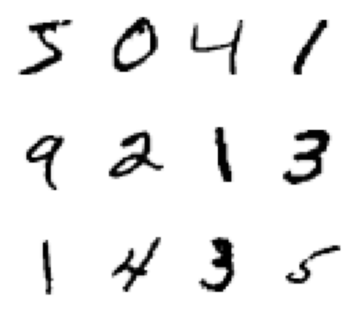

In [17]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [18]:
#reshape the data to flatten to one dimension from two. Instead of 28x28 matrices, they are now 784 element arrays
# float32 converts the pixel darkness to integers
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [19]:
# Convert pixel integers to floats so that they range from 0 to 1
X_train /=255
X_valid /=255

In [24]:
# convert our y integer labels to one-hot
n_classes=10
y_train= keras.utils.to_categorical(y_train, n_classes)
y_valid= keras.utils.to_categorical(y_valid, n_classes)

AttributeError: module 'keras.utils' has no attribute 'to_categorical'

In [25]:
#design a neural network architecture 
# instantiate a sequential neural network and specify the attributes
# our model has 64 sigmoid-type artifical neurals in the full connected level
# all of the neurons can feed into each other and access data from the input
# the input is a one-dimensional array of length 784
# the output is 10 artifical softmax neurons corresponding to 10 probabilities, one for each digit it is predicting
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

2021-09-16 13:47:25.678382: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
#fit the model 
model.compile(optimizer, loss)
model.fit(X_train, y_train, 
            batch_size=128, epochs=200, 
         verbose=1, 
         validation_data=(X_valid, y_valid))

NameError: name 'optimizer' is not defined